In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.cluster import KMeans,  AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
from sklearn.metrics import confusion_matrix 
from scipy.optimize import linear_sum_assignment
from sklearn.decomposition import TruncatedSVD, NMF
from matplotlib import pyplot as plt
import numpy as np
import random
import pandas as pd
import joblib #0.17.0
np.random.seed(0)
random.seed(0)

import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
from sklearn.metrics import confusion_matrix 

from sklearn.datasets import fetch_20newsgroups

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

newsgroups_data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))


In [57]:
vectorizer = CountVectorizer(stop_words='english',min_df=3)
tfidf_transformer = TfidfTransformer()
tfidfVectorizer = vectorizer.fit_transform(newsgroups_data.data)
tfidfVectors = tfidf_transformer.fit_transform(tfidfVectorizer)

In [58]:
print('Document shape', tfidfVectors.shape[0], tfidfVectors.shape[1])

Document shape 7882 18469


In [59]:
for i in tfidfVectors:
    print(i)

  (0, 18280)	0.05534314542245519
  (0, 18099)	0.06966577862703764
  (0, 17721)	0.044999530859338166
  (0, 17715)	0.10320308127756805
  (0, 17656)	0.10696459052642732
  (0, 17339)	0.08883847298092772
  (0, 17000)	0.10934848680575432
  (0, 16999)	0.09334734163413475
  (0, 16531)	0.05551240642619435
  (0, 16031)	0.07170230491430829
  (0, 15778)	0.10320308127756805
  (0, 15521)	0.0654108059115376
  (0, 15088)	0.40665216401014714
  (0, 15012)	0.16010138474920443
  (0, 14996)	0.06105032644531607
  (0, 14951)	0.05733769661766796
  (0, 14944)	0.10934848680575432
  (0, 14923)	0.10696459052642732
  (0, 13822)	0.08005069237460222
  (0, 13711)	0.07309625171475512
  (0, 13586)	0.06479017002236358
  (0, 13398)	0.08830471601569118
  (0, 13197)	0.08636409032007472
  (0, 13106)	0.05179355701924502
  (0, 12560)	0.06726094522562805
  :	:
  (0, 5120)	0.09903922551579866
  (0, 4948)	0.07664163653974336
  (0, 4878)	0.052826787669544295
  (0, 4577)	0.07215064243470176
  (0, 4344)	0.055857647075367285
  (0, 4

  (0, 17305)	0.12581253390831276
  (0, 16952)	0.13259977541527776
  (0, 16923)	0.11053732453110542
  (0, 16303)	0.5825744408608529
  (0, 16132)	0.1123094810963927
  (0, 14212)	0.115459423653125
  (0, 14026)	0.11515150594759725
  (0, 13613)	0.08082803072188129
  (0, 12995)	0.15675774438784246
  (0, 12708)	0.06994782498020054
  (0, 12196)	0.08194407118154563
  (0, 11786)	0.0882399768321193
  (0, 11295)	0.27518190778204993
  (0, 10253)	0.07753534776898784
  (0, 10110)	0.11846924921192138
  (0, 9942)	0.05243305570282834
  (0, 9539)	0.13118057936924649
  (0, 9316)	0.1749342104350197
  (0, 9176)	0.16942235276611795
  (0, 8806)	0.10169331674155253
  (0, 7867)	0.3249423899504534
  (0, 7440)	0.11775987758412454
  (0, 6625)	0.1504331596071246
  (0, 6590)	0.14427339149159593
  (0, 6332)	0.058004137980386464
  (0, 3408)	0.08929188794980251
  (0, 2934)	0.08657768969518129
  (0, 2117)	0.23693849842384276
  (0, 747)	0.12430343144267789
  (0, 555)	0.29423083268560096
  (0, 16670)	0.4418087375966151
  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [60]:
import scipy.sparse

In [61]:
a = scipy.sparse.find(tfidfVectors)[0]

In [62]:
print('Number of non zero elements in the tf-idf matrix:',len(a))

Number of non zero elements in the tf-idf matrix: 363940


In [63]:
7882*18469

145572658

In [64]:
from sklearn.cluster import KMeans
from sklearn import metrics


km = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30, init='k-means++')
km.fit(tfidfVectors)


KMeans(max_iter=1000, n_clusters=2, n_init=30, random_state=0)

In [65]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(2):
    print("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 just
 like
 don
 game
 think
 car
 good
 year
 know
 team
Cluster 1:
 windows
 thanks
 card
 drive
 know
 use
 does
 file
 dos
 problem


In [66]:
_, idx = np.unique(newsgroups_data.target, return_index=True)
for i in range(len(idx)):
    print(newsgroups_data.target_names[i],': target index = ', newsgroups_data.target[idx[i]])    

comp.graphics : target index =  0
comp.os.ms-windows.misc : target index =  1
comp.sys.ibm.pc.hardware : target index =  2
comp.sys.mac.hardware : target index =  3
rec.autos : target index =  4
rec.motorcycles : target index =  5
rec.sport.baseball : target index =  6
rec.sport.hockey : target index =  7


In [67]:
labels = np.zeros_like(newsgroups_data.target)
for y in [0,1,2,3]:
    labels[np.argwhere(newsgroups_data.target == y)] = 0     # Class 1 encoded as 0 corresponds to Computer Tech

for y in [4,5,6,7]:
    labels[np.argwhere(newsgroups_data.target == y)] = 1.    # Class 2 encoded as 1 corresponds to Rec

cm = metrics.cluster.contingency_matrix(labels, km.labels_)

In [68]:
print(cm)
km.labels_
km.n_iter_
km.cluster_centers_.shape
km.n_features_in_

[[1302 2601]
 [3943   36]]


18469

In [69]:
#from plot_mat.py

import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
def plot_mat(mat, xticklabels = None, yticklabels = None, pic_fname = None, size=(-
1,-1), if_show_values = True,
             colorbar = True, grid = 'k', xlabel = None, ylabel = None, title = 
None, vmin=None, vmax=None):
    if size == (-1, -1):
        size = (mat.shape[1] / 3, mat.shape[0] / 3)
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1,1,1)
    # im = ax.imshow(mat, cmap=plt.cm.Blues)
    im = ax.pcolor(mat, cmap=plt.cm.Blues, linestyle='-', linewidth=0.5, 
edgecolor=grid, vmin=vmin, vmax=vmax)
    
    if colorbar:
        plt.colorbar(im,fraction=0.046, pad=0.06)
    # tick_marks = np.arange(len(classes))
    # Ticks
    lda_num_topics = mat.shape[0]
    nmf_num_topics = mat.shape[1]
    yticks = np.arange(lda_num_topics)
    xticks = np.arange(nmf_num_topics)
    ax.set_xticks(xticks + 0.5)
    ax.set_yticks(yticks + 0.5)
    if xticklabels is None:
        xticklabels = [str(i) for i in xticks]
    if yticklabels is None:
        yticklabels = [str(i) for i in yticks]
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    # Minor ticks
    # ax.set_xticks(xticks, minor=True);
    # ax.set_yticks(yticks, minor=True);
    # ax.set_xticklabels([], minor=True)
    # ax.set_yticklabels([], minor=True)
    # ax.grid(which='minor', color='k', linestyle='-', linewidth=0.5)
    # tick labels on all four sides
    ax.tick_params(labelright = True, labeltop = False)
    if ylabel:
        plt.ylabel(ylabel, fontsize=15)
    if xlabel:
        plt.xlabel(xlabel, fontsize=15)
    if title:
        plt.title(title, fontsize=15)
    # im = ax.imshow(mat, interpolation='nearest', cmap=plt.cm.Blues)
    ax.invert_yaxis()
    # thresh = mat.max() / 2
    def show_values(pc, fmt="%.0f", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in itertools.zip_longest(pc.get_paths(), 
pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.5):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw,
fontsize=10)
    if if_show_values:
        show_values(im)
    # for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
    #     ax.text(j, i, "{:.2f}".format(mat[i, j]), fontsize = 4,
    #              horizontalalignment="center",
    #              color="white" if mat[i, j] > thresh else "black")
    plt.tight_layout()
    if pic_fname:
        plt.savefig(pic_fname, dpi=300, transparent=True)
    plt.show()
    plt.close()

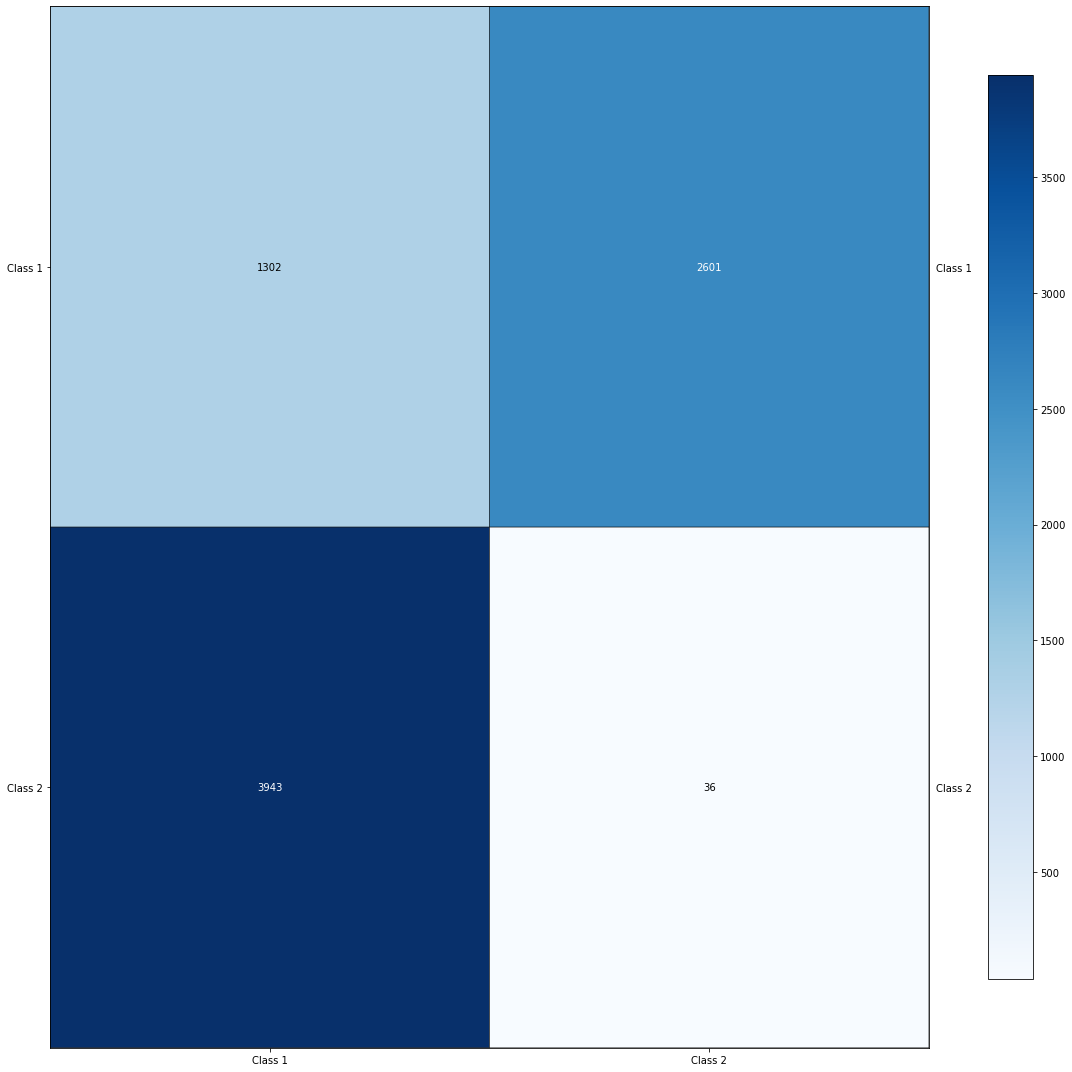

In [70]:
plot_mat(cm,size=(15,15),xticklabels = ['Class 1','Class 2'],yticklabels = ['Class 1','Class 2'],pic_fname = 'Q2.png')


In [71]:
print("Homogeneity: %0.3f" % homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"% adjusted_rand_score(labels, km.labels_))
print("Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(labels, km.labels_))

Homogeneity: 0.427
Completeness: 0.464
V-measure: 0.445
Adjusted Rand-Index: 0.436
Adjusted Mutual Information Score: 0.445


In [72]:
svd = TruncatedSVD(n_components=1000, random_state=0)
LSI = svd.fit_transform(tfidfVectors)

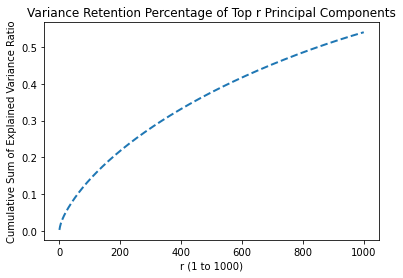

In [73]:
plt.plot(np.linspace(1,1000,1000),np.cumsum(svd.explained_variance_ratio_),lw=2,linestyle='--')
plt.title('Variance Retention Percentage of Top r Principal Components')
plt.ylabel('Cumulative Sum of Explained Variance Ratio')
plt.xlabel('r (1 to 1000)')
plt.savefig('Q4.png',dpi=300,bbox_inches='tight')
plt.show()

In [74]:
svd_hs = []
svd_cs = []
svd_vs = []
svd_ari = []
svd_ms = []
nmf_hs = []
nmf_cs = []
nmf_vs = []
nmf_ari = []
nmf_ms = []

r = [1,2,3,5,10,20,50,100,300]

for i in range(len(r)):
    print('Testing SVD for r = ',r[i])
    svd = TruncatedSVD(n_components=r[i], random_state=0)
    svd_km = svd.fit_transform(tfidfVectors)
    kmean_svd = km.fit(svd_km)
    svd_hs.append(homogeneity_score(labels, kmean_svd.labels_))
    svd_cs.append(completeness_score(labels, kmean_svd.labels_))
    svd_vs.append(v_measure_score(labels, kmean_svd.labels_))
    svd_ari.append(adjusted_rand_score(labels, kmean_svd.labels_))
    svd_ms.append(adjusted_mutual_info_score(labels, kmean_svd.labels_))    
    print('Testing NMF for r = ',r[i])
    nmf = NMF(n_components=r[i], init='random', random_state=0, max_iter=400)
    nmf_km = nmf.fit_transform(tfidfVectors)
    kmean_nmf = km.fit(nmf_km)
    nmf_hs.append(homogeneity_score(labels, kmean_nmf.labels_))
    nmf_cs.append(completeness_score(labels, kmean_nmf.labels_))
    nmf_vs.append(v_measure_score(labels, kmean_nmf.labels_))
    nmf_ari.append(adjusted_rand_score(labels, kmean_nmf.labels_))
    nmf_ms.append(adjusted_mutual_info_score(labels, kmean_nmf.labels_))

print('Done testing.')

Testing SVD for r =  1
Testing NMF for r =  1
Testing SVD for r =  2
Testing NMF for r =  2
Testing SVD for r =  3
Testing NMF for r =  3
Testing SVD for r =  5
Testing NMF for r =  5
Testing SVD for r =  10
Testing NMF for r =  10
Testing SVD for r =  20
Testing NMF for r =  20
Testing SVD for r =  50
Testing NMF for r =  50
Testing SVD for r =  100
Testing NMF for r =  100
Testing SVD for r =  300
Testing NMF for r =  300
Done testing.


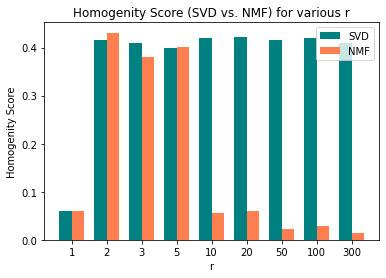

In [75]:
width = 0.35 
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(r)) - width/2, svd_hs, width, label='SVD', color = 'teal')
rects2 = ax.bar(np.arange(len(r)) + width/2, nmf_hs, width, label='NMF', color = 'coral' )
ax.set_ylabel('Homogenity Score')
ax.set_title('Homogenity Score (SVD vs. NMF) for various r')
ax.set_xticks(np.arange(len(r)))
ax.set_xticklabels(r)
ax.set_xlabel('r')
ax.legend()
plt.savefig('Q51.png',dpi=300,bbox_inches='tight')
plt.show()

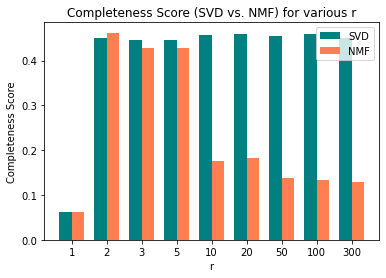

In [76]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(r)) - width/2, svd_cs, width, label='SVD', color = 'teal')
rects2 = ax.bar(np.arange(len(r)) + width/2, nmf_cs, width, label='NMF', color = 'coral')
ax.set_ylabel('Completeness Score')
ax.set_title('Completeness Score (SVD vs. NMF) for various r')
ax.set_xticks(np.arange(len(r)))
ax.set_xticklabels(r)
ax.set_xlabel('r')
ax.legend()
plt.savefig('Q52.png',dpi=300,bbox_inches='tight')
plt.show()

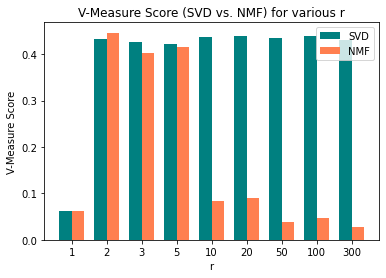

In [77]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(r)) - width/2, svd_vs, width, label='SVD', color = 'teal')
rects2 = ax.bar(np.arange(len(r)) + width/2, nmf_vs, width, label='NMF', color = 'coral')
ax.set_ylabel('V-Measure Score')
ax.set_title('V-Measure Score (SVD vs. NMF) for various r')
ax.set_xticks(np.arange(len(r)))
ax.set_xticklabels(r)
ax.set_xlabel('r')
ax.legend()
plt.savefig('Q53.png',dpi=300,bbox_inches='tight')
plt.show()

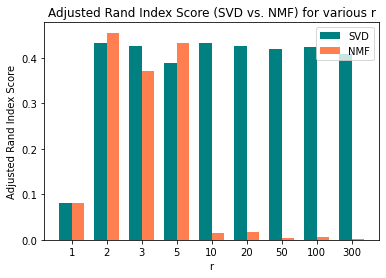

In [78]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(r)) - width/2, svd_ari, width, label='SVD', color = 'teal')
rects2 = ax.bar(np.arange(len(r)) + width/2, nmf_ari, width, label='NMF', color = 'coral')
ax.set_ylabel('Adjusted Rand Index Score')
ax.set_title('Adjusted Rand Index Score (SVD vs. NMF) for various r')
ax.set_xticks(np.arange(len(r)))
ax.set_xticklabels(r)
ax.set_xlabel('r')
ax.legend()
plt.savefig('Q54.png',dpi=300,bbox_inches='tight')
plt.show()


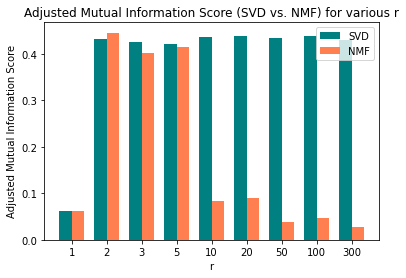

In [79]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(r)) - width/2, svd_ms, width, label='SVD', color = 'teal')
rects2 = ax.bar(np.arange(len(r)) + width/2, nmf_ms, width, label='NMF', color = 'coral')
ax.set_ylabel('Adjusted Mutual Information Score')
ax.set_title('Adjusted Mutual Information Score (SVD vs. NMF) for various r')
ax.set_xticks(np.arange(len(r)))
ax.set_xticklabels(r)
ax.set_xlabel('r')
ax.legend()
plt.savefig('Q55.png',dpi=300,bbox_inches='tight')
plt.show()

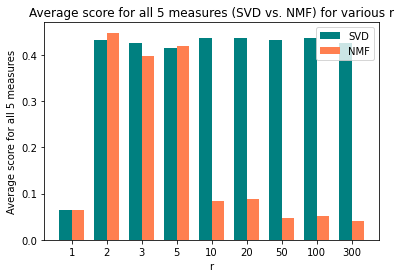

In [80]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(r)) - width/2, [y/5 for y in [sum(x) for x in zip(svd_hs, svd_cs, svd_vs, svd_ari, svd_ms)]], width, label='SVD', color = 'teal')
rects2 = ax.bar(np.arange(len(r)) + width/2, [y/5 for y in [sum(x) for x in zip(nmf_hs, nmf_cs, nmf_vs, nmf_ari, nmf_ms)]], width, label='NMF', color = 'coral')
ax.set_ylabel('Average score for all 5 measures')
ax.set_title('Average score for all 5 measures (SVD vs. NMF) for various r')
ax.set_xticks(np.arange(len(r)))
ax.set_xticklabels(r)
ax.set_xlabel('r')
ax.legend()
plt.savefig('Q56.png',dpi=300,bbox_inches='tight')
plt.show()

In [81]:
#best r for SVD: 20. Best r for NMF: 2
svd = TruncatedSVD(n_components=20, random_state=0)
svd_km = svd.fit_transform(tfidfVectors)
y_svd = km.fit_predict(svd_km)
nmf = NMF(n_components=2, init='random', random_state=0, max_iter=400)
nmf_km = nmf.fit_transform(tfidfVectors)
nmf_svd = km.fit_predict(nmf_km)

In [82]:
print("Homogeneity: %0.3f" % homogeneity_score(labels, y_svd))
print("Completeness: %0.3f" % completeness_score(labels, y_svd))
print("V-measure: %0.3f" % v_measure_score(labels, y_svd))
print("Adjusted Rand-Index: %.3f"% adjusted_rand_score(labels, y_svd))
print("Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(labels, y_svd))

Homogeneity: 0.421
Completeness: 0.460
V-measure: 0.440
Adjusted Rand-Index: 0.427
Adjusted Mutual Information Score: 0.440


In [83]:
print("Homogeneity: %0.3f" % homogeneity_score(labels, nmf_svd))
print("Completeness: %0.3f" % completeness_score(labels, nmf_svd))
print("V-measure: %0.3f" % v_measure_score(labels, nmf_svd))
print("Adjusted Rand-Index: %.3f"% adjusted_rand_score(labels, nmf_svd))
print("Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(labels, nmf_svd))

Homogeneity: 0.431
Completeness: 0.462
V-measure: 0.446
Adjusted Rand-Index: 0.455
Adjusted Mutual Information Score: 0.446


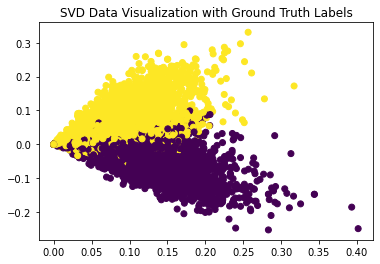

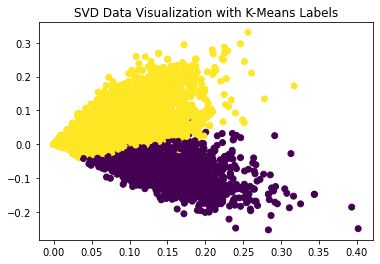

In [84]:
plt.scatter(svd_km[:,0],svd_km[:,1],c=labels)
plt.title("SVD Data Visualization with Ground Truth Labels")
plt.savefig('Q71.png',dpi=300,bbox_inches='tight')
plt.show()
plt.scatter(svd_km[:,0],svd_km[:,1],c=y_svd)
plt.title("SVD Data Visualization with K-Means Labels")
plt.savefig('Q72.png',dpi=300,bbox_inches='tight')
plt.show()


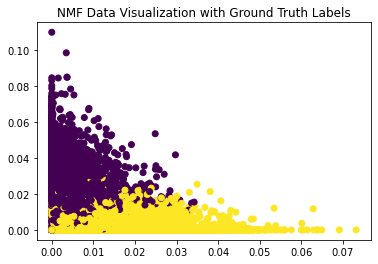

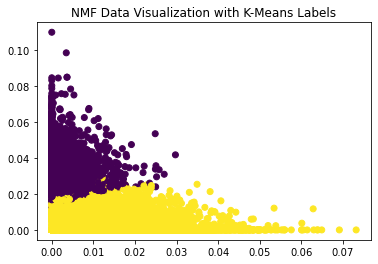

In [85]:
plt.scatter(nmf_km[:,0],nmf_km[:,1],c=labels)
plt.title("NMF Data Visualization with Ground Truth Labels")
plt.savefig('Q73.png',dpi=300,bbox_inches='tight')
plt.show()
plt.scatter(nmf_km[:,0],nmf_km[:,1],c=y_svd)
plt.title("NMF Data Visualization with K-Means Labels")
plt.savefig('Q74.png',dpi=300,bbox_inches='tight')
plt.show()

In [2]:
dataset = fetch_20newsgroups(subset = 'all',shuffle = True, random_state = 0,remove=('headers','footers'))
vectorizer = CountVectorizer(stop_words='english',min_df=3)
tfidf_transformer = TfidfTransformer()
data_feat_vec = vectorizer.fit_transform(dataset.data)
data_feat = tfidf_transformer.fit_transform(data_feat_vec)

In [87]:
import umap
Umap_cos = umap.UMAP(n_components=200, metric='cosine').fit_transform(data_feat)

In [88]:
ac_w = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(Umap_cos)

print("Agglomerative Clustering, Ward - Homogeneity: %0.3f" % homogeneity_score(dataset.target, ac_w.labels_))
print("Agglomerative Clustering, Ward - Completeness: %0.3f" % completeness_score(dataset.target, ac_w.labels_))
print("Agglomerative Clustering, Ward - V-measure: %0.3f" % v_measure_score(dataset.target, ac_w.labels_))
print("Agglomerative Clustering, Ward - Adjusted Rand-Index: %.3f"% adjusted_rand_score(dataset.target, ac_w.labels_))
print("Agglomerative Clustering, Ward - Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(dataset.target, ac_w.labels_))

Agglomerative Clustering, Ward - Homogeneity: 0.551
Agglomerative Clustering, Ward - Completeness: 0.578
Agglomerative Clustering, Ward - V-measure: 0.564
Agglomerative Clustering, Ward - Adjusted Rand-Index: 0.429
Agglomerative Clustering, Ward - Adjusted Mutual Information Score: 0.563


In [3]:
import umap
km = KMeans(n_clusters=20, init='k-means++', max_iter=1000, n_init=30, random_state=0)
Umap_cos = umap.UMAP(n_components=20, metric='cosine').fit_transform(data_feat)
kmean_cos = km.fit(Umap_cos)

In [8]:
print("k means, r = 20 - Homogeneity: %0.3f" % homogeneity_score(dataset.target, kmean_cos.labels_))
print("k means, r = 20  - Completeness: %0.3f" % completeness_score(dataset.target, kmean_cos.labels_))
print("k means, r = 20 - V-measure: %0.3f" % v_measure_score(dataset.target, kmean_cos.labels_))
print("k means, r = 20 - Adjusted Rand-Index: %.3f"% adjusted_rand_score(dataset.target, kmean_cos.labels_))
print("k means, r = 20 - Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(dataset.target, kmean_cos.labels_))

k means, r = 20 - Homogeneity: 0.548
k means, r = 20  - Completeness: 0.580
k means, r = 20 - V-measure: 0.563
k means, r = 20 - Adjusted Rand-Index: 0.425
k means, r = 20 - Adjusted Mutual Information Score: 0.562


In [9]:
Umap_cos = umap.UMAP(n_components=200, metric='cosine').fit_transform(data_feat)
kmean_cos = km.fit(Umap_cos)
print("k means, r = 200 - Homogeneity: %0.3f" % homogeneity_score(dataset.target, kmean_cos.labels_))
print("k means, r = 200  - Completeness: %0.3f" % completeness_score(dataset.target, kmean_cos.labels_))
print("k means, r = 200 - V-measure: %0.3f" % v_measure_score(dataset.target, kmean_cos.labels_))
print("k means, r = 200 - Adjusted Rand-Index: %.3f"% adjusted_rand_score(dataset.target, kmean_cos.labels_))
print("k means, r = 200 - Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(dataset.target, kmean_cos.labels_))

k means, r = 200 - Homogeneity: 0.584
k means, r = 200  - Completeness: 0.603
k means, r = 200 - V-measure: 0.594
k means, r = 200 - Adjusted Rand-Index: 0.473
k means, r = 200 - Adjusted Mutual Information Score: 0.592
